In [1]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

import pandas as pd
import numpy as np

# data_handle = 'cond1_pat59to74'
# data_handle = 'cond1_pat1to81'
data_handle = 'cond1_oversampled'
pca_mode = 'pca'

inter_dir = '../../data/intermediates'
data_subdir = data_handle + '_' + pca_mode
data_dir = inter_dir + '/' + data_subdir

fX_test = data_dir + '/X_test_' + data_handle + '.csv'
fX_train = data_dir + '/X_train_' + data_handle + '.csv'
fy_test = data_dir + '/y_test_' + data_handle + '.csv'
fy_train = data_dir + '/y_train_' + data_handle + '.csv'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
X_test = np.loadtxt(fX_test, delimiter=',')
X_train = np.loadtxt(fX_train, delimiter=',')
y_test = pd.read_csv(fy_test)
y_train = pd.read_csv(fy_train)

print('---- X_test ----')
print(X_test, '\n')
print('---- X_train ----')
print(X_train, '\n')
print('---- y_test ----')
display(y_test)
print('---- y_train ----')
display(y_train)

---- X_test ----
[[-2.20329072e+01 -2.33579996e+01 -6.55146487e+00 ... -7.97615931e-01
  -1.25870041e+00 -7.44666755e-01]
 [-5.90946941e+00 -7.52608650e+00  1.71324770e+01 ...  4.40678698e-01
   8.80494991e-01  1.33883167e+00]
 [-1.27994083e+01 -3.22556593e+01  4.74728600e+01 ... -1.47542792e-01
   1.47264566e-01  1.36497560e+00]
 ...
 [-3.36622568e+00  6.55024110e+00 -1.19705854e+01 ...  5.99820156e-01
   6.36417099e-01  8.08475775e-01]
 [ 3.23458771e+01  6.56180574e+00  5.73426059e-01 ... -2.95247746e-02
  -2.77174023e-01 -2.58527237e+00]
 [-3.55234729e+00 -2.92940181e+01  9.16513554e+00 ...  5.15465612e-01
   4.13557391e-01 -3.09785492e-01]] 

---- X_train ----
[[-2.47683199e+01 -1.84048427e+00  3.48181509e+01 ...  4.28115845e-16
   9.65928498e-16 -4.26793550e-17]
 [-5.45304068e+01 -1.78713704e+01 -1.92462077e+01 ...  1.15440648e-16
   8.35197778e-16  5.78362082e-18]
 [ 2.52385747e+02 -2.19908796e+02 -1.58969256e+02 ...  1.15440648e-16
   8.35197778e-16  5.78362082e-18]
 ...
 [-1.31

,subject,class
0,41,1
1,53,1
2,46,1
3,63,0
4,58,1
5,7,0
6,65,0
7,9,0
8,23,0
9,10,0


---- y_train ----


,subject,class
0,62,0
1,54,1
2,5,0
3,12,0
4,8,0
...,...,...
73,11,0
74,37,1
75,67,1
76,79,1


In [4]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train['class'])

CPU times: user 930 ms, sys: 178 ms, total: 1.11 s
Wall time: 1.08 s


RandomForestClassifier()

In [5]:
y_pred = rf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test['class'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [7]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(1,500), 'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

rand_search.fit(X_train, y_train['class'])

CPU times: user 12.1 s, sys: 73.5 ms, total: 12.2 s
Wall time: 12.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x126025670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11b614a60>})

In [8]:
best_est = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 423}


In [9]:
%%time
rf_best = RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'])
# rf_best = RandomForestClassifier(max_depth=100, n_estimators=4)  # inconsistent results upon repeat
rf_best.fit(X_train, y_train['class'])
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test['class'], y_pred_best)
print("Best accuracy:", accuracy_best)

Best accuracy: 0.65
CPU times: user 735 ms, sys: 7.58 ms, total: 743 ms
Wall time: 744 ms


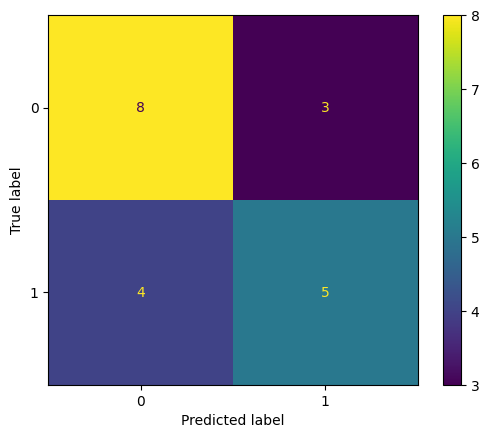

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test['class'], y_pred_best)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [12]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test['class'], y_pred)
recall = recall_score(y_test['class'], y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", 2*precision*recall/(precision + recall))

Precision: 0.8333333333333334
Recall: 0.5555555555555556
F1: 0.6666666666666667


In [ ]:
# F- I-- N---